In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import VotingRegressor

In [4]:
data=pd.read_csv('wind_generation_data.csv')
data.head()

,wind speed,direction,Power Output
0,16.00,218,34.76
1,15.91,218,36.59
2,15.82,218,32.35
3,15.73,218,39.37
4,15.64,218,33.22


In [5]:
data.describe()

,wind speed,direction,Power Output
count,366.000000,366.000000,366.000000
mean,15.695792,220.081967,37.193607
std,3.743556,4.462796,7.243363
min,7.450000,209.000000,23.170000
25%,13.000000,218.000000,31.352500
50%,15.530000,220.000000,37.525000
75%,18.802500,222.000000,42.925000
max,22.710000,234.000000,51.810000


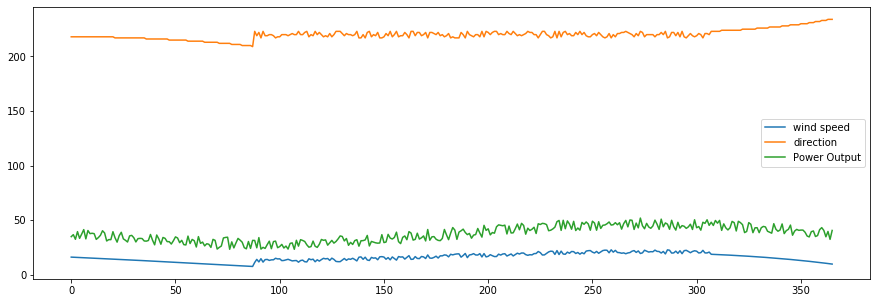

In [11]:
data.plot(figsize=(15,5))

In [12]:
X=data[['direction','wind speed']]
y=data['Power Output']

In [13]:
# Split Data to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [14]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
kneigbour=KNeighborsRegressor()
kneigbour.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [16]:
print('Accuracy: {}'.format(kneigbour.score(X_test, y_test)))

Accuracy: 0.7584289302235131


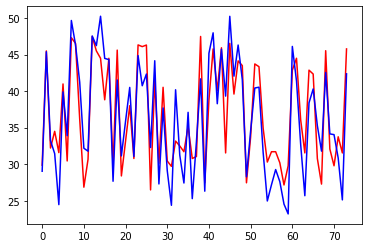

In [17]:
plt.plot(kneigbour.predict(X_test),color='red')
plt.plot(y_test.values,color='blue')

In [18]:
filename = 'wind_model.sav'
pickle.dump(kneigbour, open(filename, 'wb'))

In [19]:
loaded_model = pickle.load(open('wind_model.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7584289302235131
